In [1]:
import pandas as pd

# Cargar el dataset (descargarlo desde Kaggle si no lo tienes)
url = 'C:/Users/Diego/Desktop/ML/data/train/titanic.csv'
df = pd.read_csv(url)

# Ver las primeras filas del dataset
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
# Eliminar columnas irrelevantes que no aportan valor al modelo
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Rellenar valores nulos
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convertir variables categóricas a variables numéricas
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verificar si hay valores nulos
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (664, 7)
Tamaño del conjunto de prueba: (167, 7)


In [4]:
print(X_train.dtypes)

Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object


Árbol de Decisión

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42,max_depth=4)
tree_model.fit(X_train, y_train)

# Predecir
y_pred_tree = tree_model.predict(X_test)

# Evaluar precisión
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))


Precisión del Árbol de Decisión: 0.7964071856287425


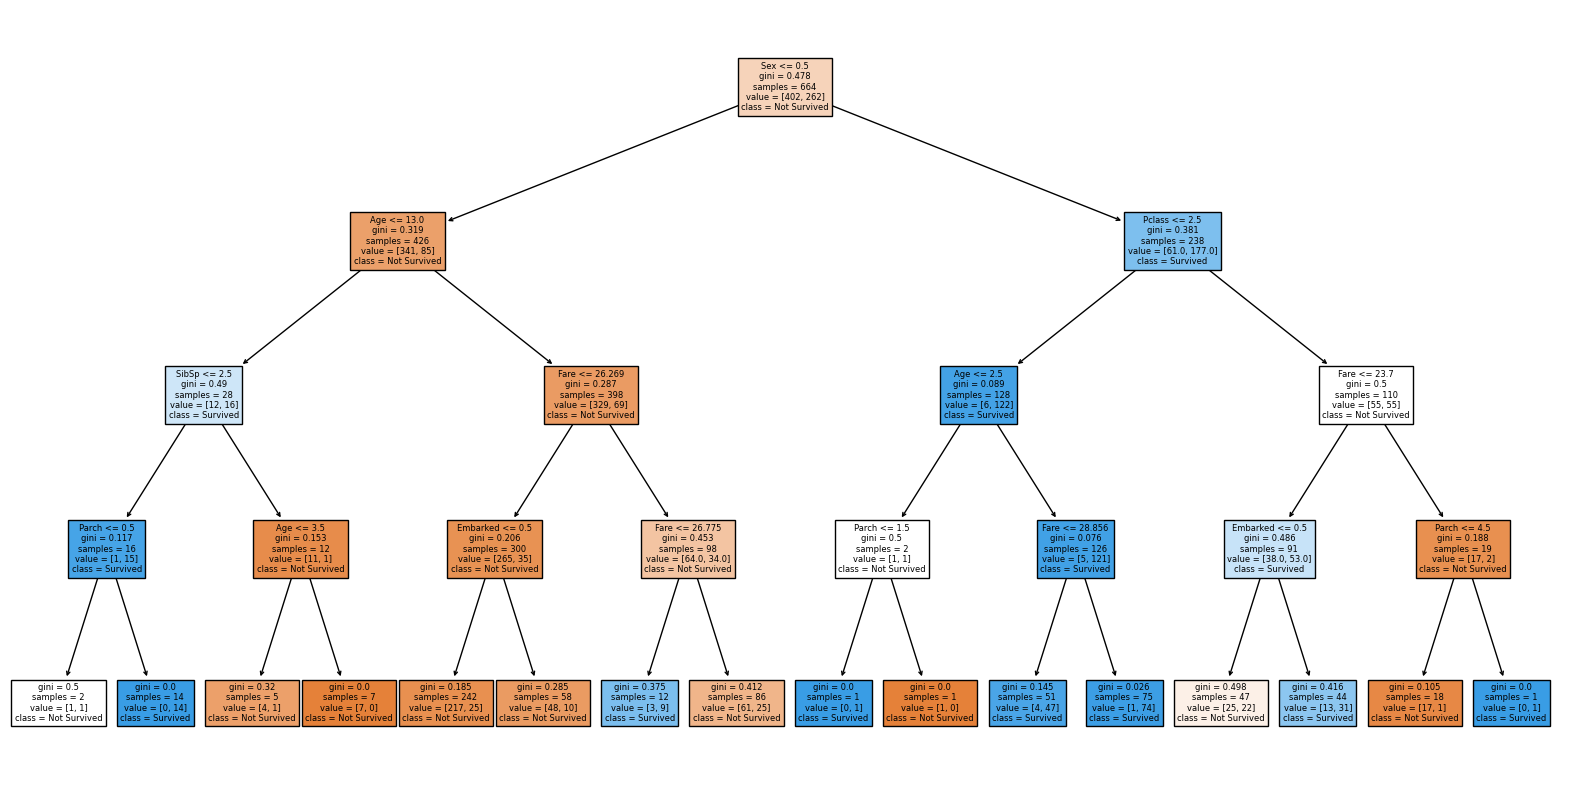

In [14]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que estas son las características del dataset Titanic
feature_names = X_train.columns  # Nombres de las características
class_names = ['Not Survived', 'Survived']  # Etiquetas para las clases

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura
plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()


Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir
y_pred_rf = rf_model.predict(X_test)

# Evaluar precisión
print("Precisión del Random Forest:", accuracy_score(y_test, y_pred_rf))

Precisión del Random Forest: 0.7784431137724551


SVM (Máquinas de Vectores de Soporte)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
print("Matriz de Confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Reporte de clasificación
print("Reporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Matriz de Confusión (Random Forest):
[[87 22]
 [15 43]]
Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.66      0.74      0.70        58

    accuracy                           0.78       167
   macro avg       0.76      0.77      0.76       167
weighted avg       0.79      0.78      0.78       167



Matriz de confusión y reporte de clasificación


In [9]:
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
print("Matriz de Confusión (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

# Reporte de clasificación
print("Reporte de Clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Matriz de Confusión (Random Forest):
[[87 22]
 [15 43]]
Reporte de Clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       109
           1       0.66      0.74      0.70        58

    accuracy                           0.78       167
   macro avg       0.76      0.77      0.76       167
weighted avg       0.79      0.78      0.78       167



Optimización de los modelos (Opcional)
Puedes mejorar el rendimiento de los modelos ajustando los hiperparámetros con GridSearchCV o RandomizedSearchCV.

Visualización de importancia de las características (Random Forest)

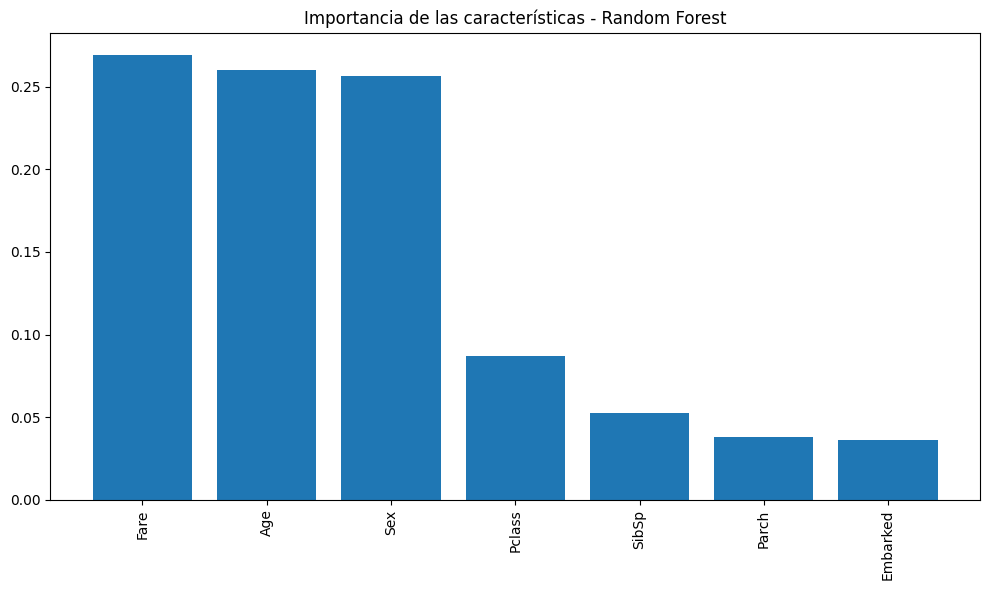

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Importancia de las características
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Graficar
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [12]:
pip uninstall tensorflow tensorflow-estimator keras h5py


^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade pip setuptools wheel

In [11]:
# Importar librerías necesarias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
#pip install tensorflow-cpu

In [ ]:
# Definir X (características) e y (etiquetas)
X = df[['Pclass', 'Sex', 'Age', 'Fare']]  # Características
y = df['Survived']  # Etiqueta

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Construir el modelo de red neuronal
model = Sequential()

# Capa de entrada y oculta con 16 neuronas y activación ReLU
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))

# Segunda capa oculta
model.add(Dense(8, activation='relu'))

# Capa de salida con una neurona (para clasificación binaria) y activación sigmoide
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")